# Generating the MW potential using McMillan's standalone GalPot and its python wrapper

We compare the best model from McMillan (2017, henceforth PJM17) with and without central hole, 
and create tables for the gravitational potential that can be read by our PLUTO code setup.

We also plot the density, surface density, enclosed mass profiles, and rotation curves.



In [12]:
# Some helpful imports
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate

# import mpl_aesth

from cycler import cycler

plt.style.use('seaborn')

use_kpfonts = True


dark_mode = True
if dark_mode:
    fc = 'white'
    fc_i = 'black'
    fc_n = (1, 1, 1, 0.3)
    # TODO: Make the colorpalette below a bit lighter
    tableau10_colors = ['006BA4', 'FF800E', 'ABABAB', '595959', '5F9ED1', 'C85200', '898989', 'A2C8EC', 'FFBC79',
                        'CFCFCF']
else:
    fc = 'black'
    fc_i = 'white'
    fc_n = (0, 0, 0, 0.1)
    tableau10_colors = ['006BA4', 'FF800E', 'ABABAB', '595959', '5F9ED1', 'C85200', '898989', 'A2C8EC', 'FFBC79',
                        'CFCFCF']

plt.rcParams['axes.prop_cycle'] = cycler(color=['#' + s for s in tableau10_colors])

plt.rcParams.update({
    'text.color': fc,
    'axes.labelcolor': fc,
    'xtick.color': fc,
    'ytick.color': fc,
    'xtick.direction': 'in',
    'ytick.direction': 'in',
    'grid.color': fc_i,
    # 'axes.axisbelow': False,
    'grid.alpha': 0.5,
    'axes.facecolor': fc_n,
    # 'axes.grid.which': 'both',
    # 'axes.grid.axis': 'both',
    'figure.facecolor': (0, 0, 0, 0),
    # 'figure.edgecolor': 'black',
    'savefig.facecolor': (0, 0, 0, 0),
})

if use_kpfonts:
    plt.rcParams.update({
        'font.family': 'serif',
        'text.usetex': True,
        'text.latex.preamble': [
            r'\usepackage{amsmath}',
            r'\usepackage{amssymb}',
            r'\usepackage{siunitx}',
            r'\usepackage[notextcomp]{kpfonts}',
        ],
    })

else:
    plt.rcParams.update({
        'font.family': 'serif',
        'font.serif': 'Times New Roman',
        'font.sans-serif': 'Times New Roman',
        'mathtext.fontset': 'cm',
    })



Import GalaxyPotential class

In [13]:
from GalPot import GalaxyPotential

## Calculating the potential

Load the potential file

In [14]:
Phi = GalaxyPotential("pot/PJM17_best.Tpot")
Phi_nh = GalaxyPotential("pot/PJM17_best_nohole.Tpot")

> Note: All the internal workings are in units M<sub>sun</sub>, kpc, Myr (as in the C++ code).
Conversions for velocities can be applied with the helpful GalaxyPotential value kpc_Myr_to_km_s (=977.77)


The domain

In [15]:
R_arr = np.linspace(0.1,10,100)
z_arr = np.linspace(0.1,10,100)

Find potential

In [16]:
# Find Potential
phi = Phi.Potential(R_arr, z_arr)
vconv = Phi.kpc_Myr_to_km_s

Find derivatives wrt R & z of potential

In [17]:
dphidr = Phi.Potential_derivatives(R_arr, z_arr)

Find density as functions of R and z

In [18]:
rho = Phi.Density(R_arr,z_arr)

Find mass within a given radius

In [20]:
mass = Phi.Mass(R_arr)

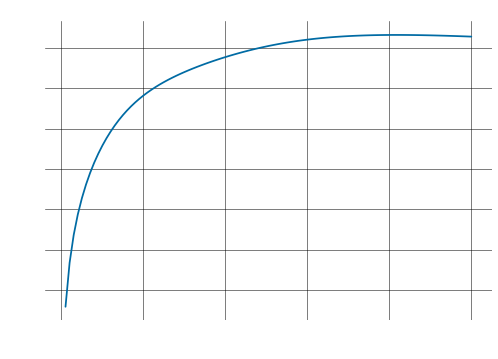

In [21]:
plt.plot(R_arr, Phi.Vcirc(R_arr) * vconv)
plt.xlabel('R')
plt.ylabel(r'$v_c$')
plt.title('Rotation curve')
plt.show()

## Potential as a function of R,z

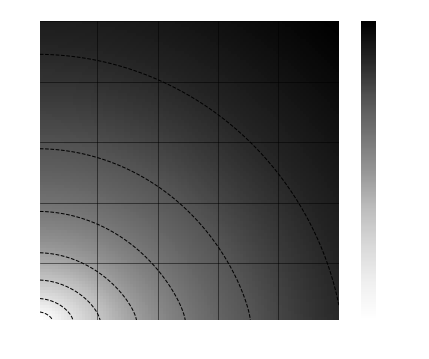

In [22]:
RRgrid, ZZgrid = np.meshgrid(R_arr,z_arr)
Pot = Phi.Potential(np.array(RRgrid).flatten(),np.array(ZZgrid).flatten())
Pot = Pot.reshape((len(R_arr),len(z_arr)))

plt.imshow(Pot, origin='lower',extent=[np.min(R_arr), np.max(R_arr), np.min(z_arr), np.max(z_arr)])
plt.gca().set_aspect('equal')

plt.colorbar(label='Potential')
plt.contour(RRgrid,ZZgrid,Pot,colors='k',linewidths=1)
plt.xlabel('R')
plt.ylabel('z')
plt.title('PJM17 best potential')
plt.show()

